In [1]:
import pandas as pd
# csv format from FlightRadar24
flight = pd.read_csv("../data/20171214_KL1300_(fd43298).csv", parse_dates=['UTC'])
flight['lat'], flight['lon'] = list(zip(*flight.Position.apply(lambda x: [float(t) for t in x.split(',')])))

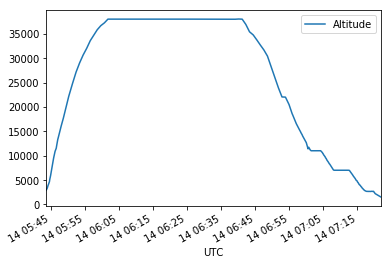

In [2]:
%matplotlib inline
flight.plot(x='UTC', y='Altitude')

In [3]:
from traffic.tools import douglas_peucker

mask = douglas_peucker(df=flight, max_dist=1e3, lat='lat', lon='lon')

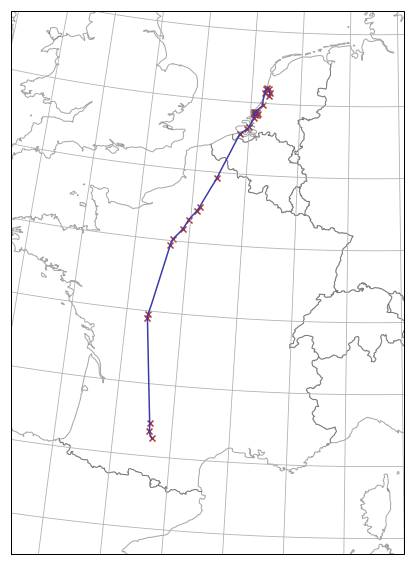

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from cartopy.crs import EuroPP, PlateCarree
from cartopy.feature import NaturalEarthFeature

countries = NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='10m',
    edgecolor='#524c50',
    facecolor='none',
    alpha=.5)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=EuroPP())

ax.add_feature(countries)
ax.gridlines()
ax.set_extent((-3, 10, 41, 54))

ax.plot(flight.lon, flight.lat,
        transform=PlateCarree(), color="#3a3aaa")

ax.scatter(flight[mask].lon, flight[mask].lat,
           transform=PlateCarree(), color="#aa3a3a", marker='x')

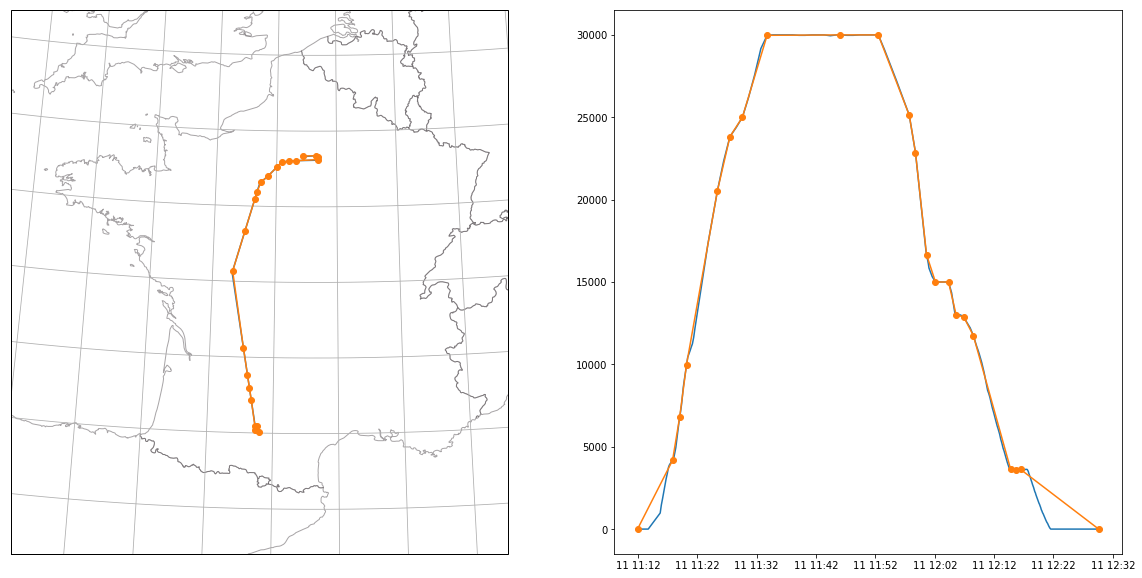

In [1]:
import pandas as pd

p = pd.read_csv("/home/xo/Documents/nextCloud/travel/adsb/csv/20161211_AF7521_(bdc2b2d).csv")

from operator import itemgetter

p['lat'] = p.Position.str.split(",").apply(itemgetter(0)).astype(float)
p['lon'] = p.Position.str.split(",").apply(itemgetter(1)).astype(float)


%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from datetime import datetime
from cartopy.crs import EuroPP, PlateCarree
from cartotools.crs import Lambert93
from cartopy.feature import NaturalEarthFeature

from traffic.tools import douglas_peucker


countries = NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='10m',
    edgecolor='#524c50',
    facecolor='none',
    alpha=.5)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121, projection=Lambert93())


dp = douglas_peucker(df=p, lon='lon', lat='lat',  z='Altitude', tolerance=1e3,)
ax.add_feature(countries)
ax.gridlines()
ax.set_extent((-5, 8, 41, 52))

ax.plot(p.lon, p.lat, transform=PlateCarree())
ax.plot(p[dp].lon, p[dp].lat, '-o', transform=PlateCarree())

ax1 = fig.add_subplot(122)
ax1.plot(p.Timestamp.apply(datetime.fromtimestamp), p.Altitude)
ax1.plot(p[dp].Timestamp.apply(datetime.fromtimestamp), p[dp].Altitude, '-o')
#for sector in ['PT', 'RL', 'US4']:
#    sectors[f'LFBB{sector}'].plot(ax, edgecolor='green', linestyle='--', alpha=.5)
#    sectors[f'LFBB{sector}'].annotate(ax, color='green', fontname='Ubuntu')

